# GridSeachCV For Model optimization

### IMPORT LIBRARIES

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

### LOAD THE DATASET

In [3]:
data = pd.read_csv("diabetes.csv")

### CREATE THE PARAMETER

In [4]:
x = data.drop('class',axis =1 )
y = data['class']

### DIVIDE THE DATA INTO 3 PARTS: TRAINING , VALIDATION AND TESTING DATA

In [5]:
# save 20% of your dataset for final testing
# use 80% for training and validation process

# STEPS:
 #1. first divide our dataset into 80(training):20(test)
 #2. next divide the 80 part to training and validation

x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.2, random_state = 1)
x_train2, x_val, y_train2, y_val = train_test_split(x_train1,y_train1,test_size=0.25, random_state = 1)

In [8]:
print(f"Total dataset {len(x.values)}")
print(f"Total test data saved for future use: {len(x_test1 + y_test1)}")
print(f"Total training data: {len(x_train2 + y_train2)}")
print(f"Total validation data: {len(x_val+y_val)}")

Total dataset 768
Total test data saved for future use: 154
Total training data: 491
Total validation data: 123


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(x_train2,y_train2)

KNeighborsClassifier()

In [9]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [10]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm':('auto', 'ball_tree','kd_tree', 'brute')
             }

In [11]:
from sklearn.model_selection import GridSearchCV

# Create the model
gs=GridSearchCV(knn_clf, param_grid, cv=20)

# FIT THE MODEL
gs.fit(x_train2,y_train2)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [12]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

In [13]:
gs.cv_results_['mean_test_score']

array([0.67391304, 0.7       , 0.7       , 0.70652174, 0.7       ,
       0.71086957, 0.71521739, 0.72608696, 0.67391304, 0.7       ,
       0.7       , 0.70652174, 0.7       , 0.71086957, 0.71521739,
       0.72608696, 0.67391304, 0.7       , 0.7       , 0.70652174,
       0.7       , 0.71086957, 0.71521739, 0.72608696, 0.67391304,
       0.7       , 0.7       , 0.70652174, 0.7       , 0.71086957,
       0.71521739, 0.72608696])

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 8, algorithm='auto')

knn_clf.fit(x_train2,y_train2)

KNeighborsClassifier(n_neighbors=8)

In [15]:
from sklearn import metrics
y_pred = knn_clf.predict(x_test1)
print(f"Accuracy: {metrics.accuracy_score(y_test1, y_pred)}")

Accuracy: 0.7467532467532467


### PLOTING USING CONFUSION MATRIX

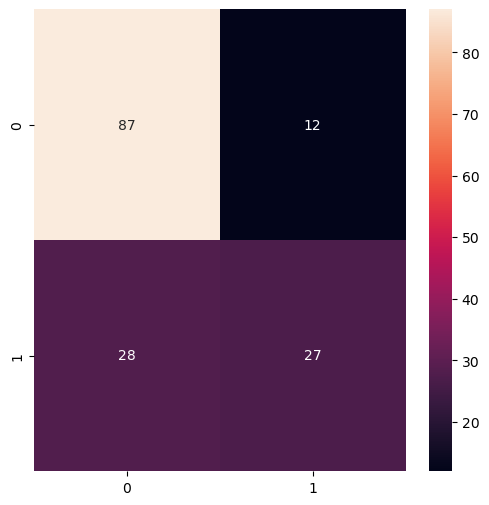

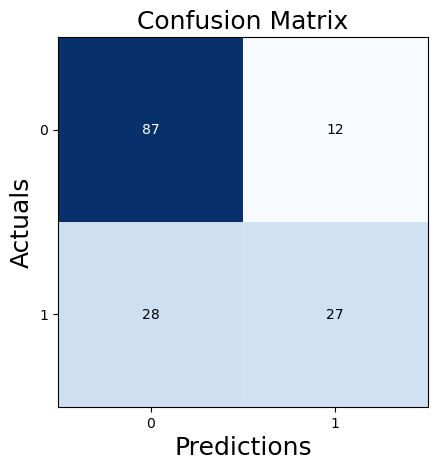

In [27]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test1,y_pred)

plt.figure(figsize=(6,6))
import seaborn as sns
sns.heatmap(cm,annot=True)

fig, ax = plot_confusion_matrix(cm)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## CLASSIFICATION REPORT


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        99
           1       0.69      0.49      0.57        55

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



### AUC AND ROC CURVE

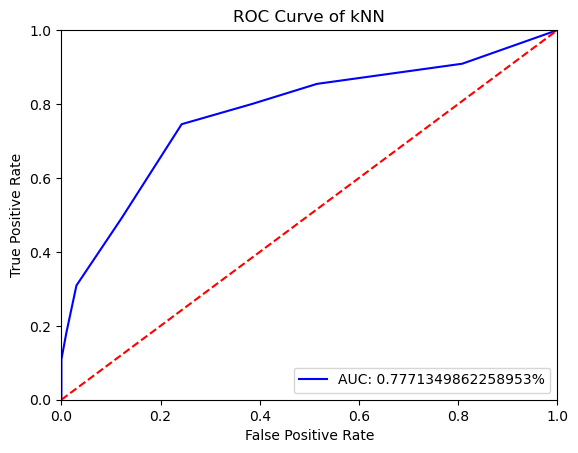

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn_clf.predict_proba(x_test1)
fpr, tpr, threshold = roc_curve(y_test1, y_scores[:,1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f"AUC: {roc_auc}%" )
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()